In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 200)

In [2]:
data = pd.read_csv('data/adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.rename(columns={
    'educational-num': 'educational_num', 
    'marital-status': 'marital_status',
    'capital-gain': 'capital_gain',
    'capital-loss': 'capital_loss',
    'hours-per-week': 'hours_per_week',
    'native-country': 'native_country'
    }, inplace=True)

data.head()

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Общая информация о датасете

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational_num  48842 non-null  int64 
 5   marital_status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital_gain     48842 non-null  int64 
 11  capital_loss     48842 non-null  int64 
 12  hours_per_week   48842 non-null  int64 
 13  native_country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Информация полученная методом *info* показывает, что все объекты в датасете являются не нулевыми (not NA). 

In [5]:
data.workclass.unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [6]:
data.education.unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [7]:
data.marital_status.unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [8]:
data.occupation.unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [9]:
data.relationship.unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [10]:
data.race.unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [11]:
data.gender.unique()

array(['Male', 'Female'], dtype=object)

In [12]:
data.native_country.unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [13]:
data.income.unique()

array(['<=50K', '>50K'], dtype=object)

При этом можем заметить, что некоторые столбцы имеют данные, которые можно отнести к NA.  
Колонки *workclass, occupation, native_country*  
Заменим их на NaN

In [14]:
data.workclass.replace({'?': np.nan}, inplace=True)
data.occupation.replace({'?': np.nan}, inplace=True)
data.native_country.replace({'?': np.nan}, inplace=True)

## Удаляем NaN из датасета

Как вариант можно было бы заполнить пропущенные данные либо средним, либо медианным значением, но в данном случае подобные замены могут сильно повлиять на конечный результат. 

In [15]:
data = data[~(data['workclass'].isna())]
data = data[~(data['occupation'].isna())]
data = data[~(data['native_country'].isna())]

В итоге теряется примерно 2 тыс. записей, что составляет 4% - неприятно, но не критично. 

## Предобработка данных

In [16]:
selected_data = data[['age', 'workclass', 'education', 'marital_status', 
                     'occupation', 'relationship', 'race', 'gender', 'native_country', 'income']]
selected_data.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,native_country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [17]:
X = pd.get_dummies(selected_data, columns=['workclass', 'education', 'marital_status', 'occupation', 
                                          'relationship', 'race', 'gender', 'native_country'])

In [18]:
y = X.income
del X['income']

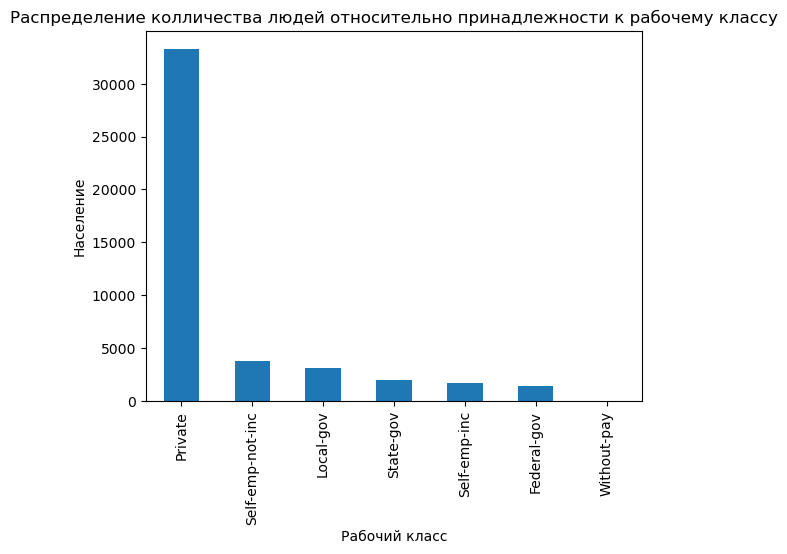

In [19]:
data.workclass.value_counts().plot(kind='bar', xlabel='Рабочий класс', ylabel='Население')
plt.title('Распределение колличества людей относительно принадлежности к рабочему классу')

plt.show()

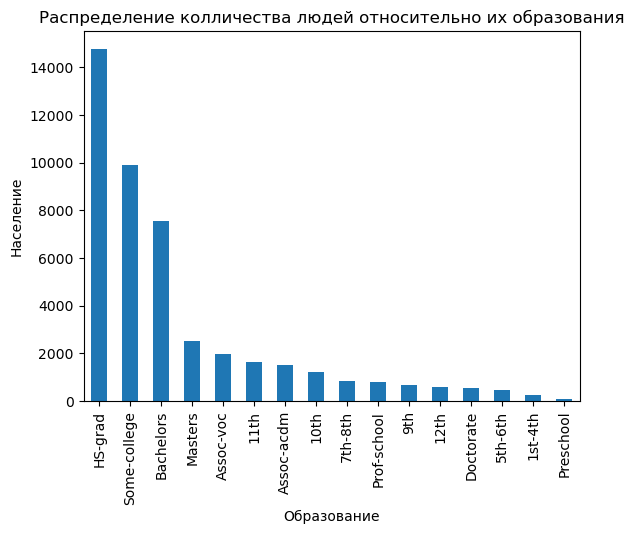

In [20]:
data.education.value_counts().plot(kind='bar', xlabel='Образование', ylabel='Население')
plt.title('Распределение колличества людей относительно их образования')
plt.show()

Исходя из диаграммы распределения людей по образованию получается, что большая часть людей окончила старшую школу. Следующим по значению идут колледж и степень бакалавра. 

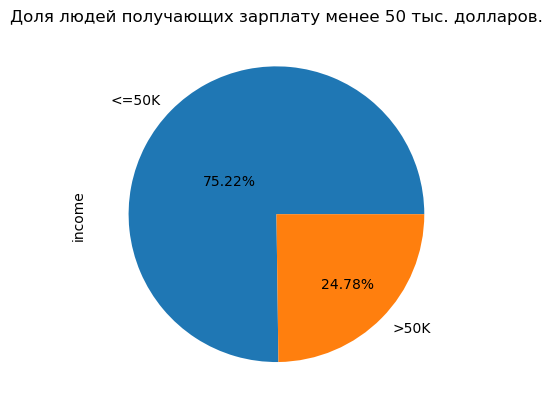

In [21]:
data.income.value_counts().plot(kind='pie')
plt.title('Доля людей получающих зарплату менее 50 тыс. долларов.')
plt.text(-0.5, 0.2, f'{round((data.income.value_counts()[0] / data.income.value_counts().sum())*100, 2)}%')
plt.text(0.3, -0.5, f'{round((100-(data.income.value_counts()[0] / data.income.value_counts().sum())*100), 2)}%')
plt.show()

## Логистическая регрессия

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
le.fit(y)

LabelEncoder()

In [24]:
y_ = pd.Series(data=le.transform(y))

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

Делим выборку на тестовую и тренировочную

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.2, random_state=42)

In [27]:
%%time

model.fit(X_train, y_train)
predictions = model.predict(X_test)

CPU times: user 1.27 s, sys: 159 ms, total: 1.42 s
Wall time: 249 ms


In [28]:
%%time

model.score(X_train, y_train) 

CPU times: user 96.5 ms, sys: 77.6 ms, total: 174 ms
Wall time: 25.4 ms


0.8285374685573708

In [29]:
%%time

model.score(X_test,y_test)

CPU times: user 45.6 ms, sys: 10.4 ms, total: 56 ms
Wall time: 9 ms


0.8296296296296296

Точность модели: составила 83%

### Вывод
Использование логистической регрессии для предсказания уровня дохода по признакам: возраст, рабочий класс, образование, семейное положение, рабочая область, отношения, раса, гендер, родная страна, с точностью 83% позволит предсказать уровень дохода. 

## Метод опорных векторов. SVM.

In [30]:
from sklearn.svm import SVC

In [31]:
%%time

clf = make_pipeline(StandardScaler(), SVC()) 
clf.fit(X_train, y_train)

CPU times: user 1min 11s, sys: 795 ms, total: 1min 12s
Wall time: 1min 12s


Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [32]:
%%time

clf.score(X_train, y_train)

CPU times: user 1min, sys: 203 ms, total: 1min
Wall time: 1min 1s


0.8360007739724135

In [33]:
%%time

clf.score(X_test, y_test)

CPU times: user 15.2 s, sys: 30 ms, total: 15.2 s
Wall time: 15.3 s


0.8330569375345495

Точность модели: составила 84%

### Вывод
Использование метода опорных векторов для предсказания уровня дохода по признакам: возраст, рабочий класс, образование, семейное положение, рабочая область, отношения, раса, гендер, родная страна, с точностью 83% позволит предсказать уровень дохода. 

### Общее наблюдение
Логистическая регрессия значительно быстрее обрабатывает данные (обучение за 249 мс, точность 9-25 мс), чем метод опорных векторов (обучение за 1 мин 12 с, точность 15 с - 1 мин). 